In [1]:
import seaborn as sns

import pandas as pd

import numpy as np

import datetime

import miceforest as mf

from sklearn import preprocessing

In [3]:
data = pd.read_csv("/Users/melissalian/Desktop/untitled folder/new.csv")

In [4]:
data

,Year,Month,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),Region
0,2014,1,2.254839,1.105735,1.286380,1.499642,25.901613,29.362903,23.824194,7.935484,36.003226,Central
1,2014,1,2.793548,1.690323,1.887097,2.109677,26.600000,30.274194,24.580645,10.580645,34.703226,Central Business District and Surrounding
2,2014,1,1.758986,0.786022,0.896774,1.069892,26.366129,29.752688,24.223656,13.506452,36.680645,East
3,2014,1,2.735484,1.658065,1.980645,2.154839,26.458065,29.867742,24.470968,8.467742,32.535484,Islands
4,2014,1,3.282581,0.941935,1.167742,1.403226,25.993441,29.500000,23.303226,11.990323,37.770968,North
...,...,...,...,...,...,...,...,...,...,...,...,...
1048,2023,9,4.765000,2.263725,2.715725,3.184039,28.426667,32.683333,25.373333,7.626667,33.453333,North
1049,2023,9,5.910000,3.933333,4.783333,5.276667,28.586667,32.553333,25.740000,9.240000,36.786667,North-East
1050,2023,9,4.887778,3.501111,4.192222,4.498889,29.120000,30.866667,27.030000,13.716667,37.113333,South-East
1051,2023,9,5.048889,3.266667,4.042222,4.493333,28.996667,31.610000,26.916667,16.986667,46.563333,South-West


In [5]:
data["Date"] = pd.to_datetime(data.Year.astype(str) + '/' + data.Month.astype(str) + '/01')

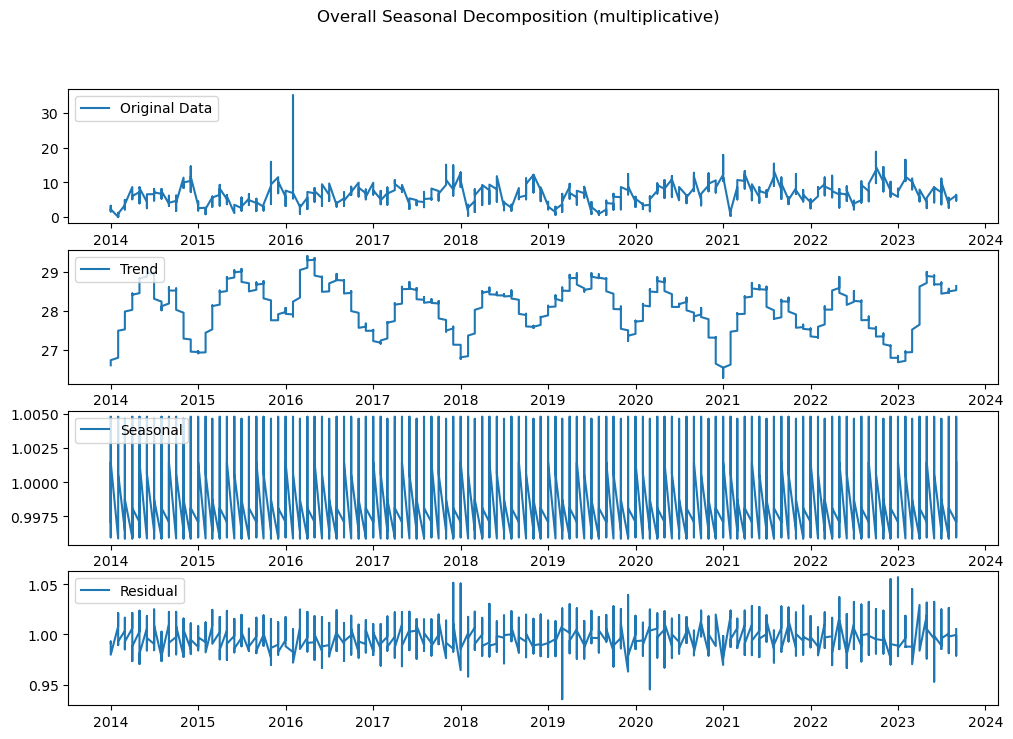

In [7]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

data.set_index('Date', inplace=True)

# Perform overall seasonal decomposition
result = sm.tsa.seasonal_decompose(data['Mean Temperature (°C)'], model='multiplicative', period=12)

# Plot the decomposed trend, seasonal, and residual components
plt.figure(figsize=(12, 8))
plt.suptitle('Overall Seasonal Decomposition (multiplicative)')
plt.subplot(411)
plt.plot(data['Daily Rainfall Total (mm)'], label='Original Data')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.show()

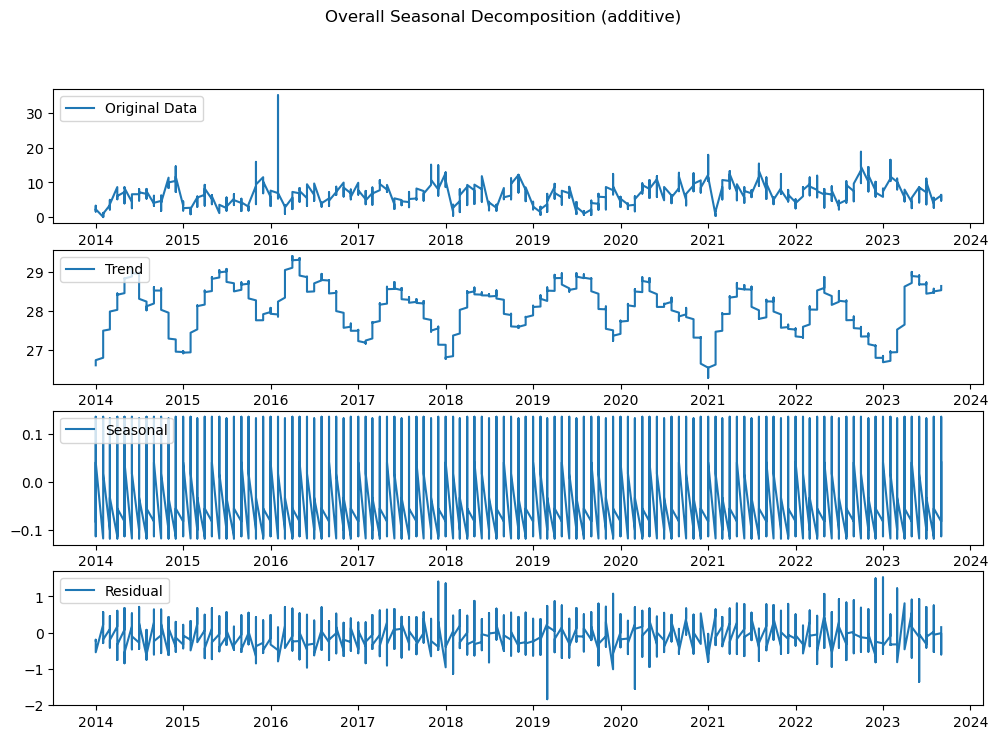

In [8]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Perform overall seasonal decomposition
result = sm.tsa.seasonal_decompose(data['Mean Temperature (°C)'], model='additive', period=12)

# Plot the decomposed trend, seasonal, and residual components
plt.figure(figsize=(12, 8))
plt.suptitle('Overall Seasonal Decomposition (additive)')
plt.subplot(411)
plt.plot(data['Daily Rainfall Total (mm)'], label='Original Data')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.show()